In [84]:
#import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Optimization via Gradient Descent

In [85]:
def f_test(x):
    return x**2 + 2*x +1

def grad_f_test(x):
    return (2*x + 2)

In [86]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

In [87]:
def GD(f, grad_f, x0, kmax, tolf=1e-6, tolx=1e-6, step=0.001, useBackTracking=False, real_value=None):
    
    k = 0
    true_errors = []
    
    dim_m, dim_n = (kmax+1, ) + x0.shape

    x = np.empty((dim_m, dim_n))
    f_val = np.empty((kmax+1, ))
    grads = np.empty((dim_m, dim_n))
    err_val = np.empty((kmax+1, ))
    
    x[k]=x0
    f_val[k] = f(x0)
    grads[k] = grad_f(x0)
    err_val[k] = np.linalg.norm(grad_f(x0))
    if(real_value!=None): true_errors.append(np.linalg.norm(real_value - x[k]))
    
    conditions = True

    while (conditions and k < kmax):        
        k = k+1

        if useBackTracking:
            alpha = backtracking(f, grad_f, x[k])
        else:
            alpha = step

        x[k] = x[k-1]-alpha*grad_f(x[k-1])
        f_val[k] = f(x[k])
        grads[k] = grad_f(x[k])
        err_val[k] = np.linalg.norm(grad_f(x[k]))
        if(real_value!=None): true_errors.append(np.linalg.norm(real_value - x[k]))

        cond1 = np.linalg.norm(grad_f(x[k])) > tolf * grad_f(x[k-1]).all()
        cond2 = np.linalg.norm(x[k] - x[k-1]) > tolx * np.linalg.norm(x[k-1]).all()
        conditions = cond1 and cond2

    x = x[:k+1]
    f_val = f_val[:k+1]
    grads = grads[:k+1]
    err_val = err_val[:k+1]

    x_star = x[k, np.newaxis].repeat(k+1, axis=0)
    errors_star = np.linalg.norm(x-x_star, axis=1)
    
    return x, k, f_val, grads, err_val, errors_star, true_errors

In [88]:
x, k, fval, grads, errval, errors_star, _ = GD(lambda x:f_test(x), lambda x:grad_f_test(x), np.asarray([0]), 1000)
print(x[k])

[-0.86493548]


- Test the algorithm above on the following functions:
1. $f : \mathbb{R}^2 → \mathbb{R}$ such that

    $f(x_1, x_2) = (x_1 − 3)^2 + (x_2 − 1)^2$
    
    for which the true optimum is $x^* = (3, 1)^T$

<br>

2. $f : \mathbb{R}^2 → \mathbb{R}$ such that

    $f(x1, x2) = 10(x_1 − 1)^2 + (x_2 − 2)^2$

    for which the true optimum is $x^* = (1, 2)^T$

<br>

3. $f : \mathbb{R}^n → \mathbb{R}$ such that

    $f(x) = \frac{1}{2}||Ax − b||_2^2$

    where $A ∈ \mathbb{R}^{n×n}$ is the Vandermonde matrix associated with the vector $v ∈ \mathbb{R}^n$ that contains $n$ equispaced values in the interval $[0, 1]$, and $b ∈ \mathbb{R}^n$ is computed by first setting $x_{true} = (1, 1, . . . , 1)^T$ and then $b = Ax_{true}$. Try for different values of $n$ (e.g. $n = 5, 10, 15, . . .$)

<br>

4. $f : \mathbb{R}^n → \mathbb{R}$ such that

    $f(x) = \frac{1}{2}||Ax − b||_2^2+\frac{λ}{2}||x||_2^2$
    
    where $A$ and $b$ are the same of the exercise above, while $λ$ is a fixed value in the interval $[0, 1]$.
    Try different values for $λ$.

<br>

5. $f : \mathbb{R} -> \mathbb{R}$ such that

    $f(x) = x^4 + x^3 -2x^2 - 2x$



- For each of the functions above, run the GD method with and without the backtracking, trying different values for the step size $\alpha > 0$ when you are not using backtracking. Observe the different behavior of GD.
<br>
- To help visualization, it is convenient to plot the error vector that contains the $||∇f(x_k)||_2$, to check that it goes to zero. Compare the convergence speed (in terms of the number of iterations k) in the different cases.
<br>
- For each of the points above, fix $x_0= (0, 0, ..., 0)^T$, kmax = 100, while choose your values for tolf and tolx. It is recommended to also plot the error $||x_k - x^*||_2$ varying k when the true $x^*$ is available.
- Only for the non-convex function defined in 5, plot it in the interval [-3; 3] and test the convergence point of GD with different values of $x_0$ and different step-sizes. Observe when the convergence point is the global minimum and when it stops on a local minimum or maximum.

In [89]:
def f1(x):
    return (x[0]-3)**2 + (x[1]-1)**2

def grad_f1(x):
    grad = np.empty(len(x))
    grad[0] = 2*(x[0]-3)
    grad[1] = 2*(x[1]-1)

    return grad


def f2(x):
    return 10*(x[0]-1)**2 + (x[1]-2)**2    

def grad_f2(x):
    grad = np.empty(len(x))
    grad[0] = 20*(x[0]-1)
    grad[1] = 2*(x[1]-2)

    return grad


def f3(x, n):
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones((n, ))
    b = A@x_true

    y = 1/2 * (np.linalg.norm(A@x - b))**2

    return y

def grad_f3(x, n):
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones((n, ))
    b = A@x_true

    grad = A.T @ (A@x - b)
    
    return grad


def f4(x, n, L):
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones((n, ))
    b = A@x_true

    y1 = 1/2 * (np.linalg.norm(A@x - b))**2
    y2 = L/2 * (np.linalg.norm(x))**2

    return y1 + y2

def grad_f4(x, n, L):
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones((n, ))
    b = A@x_true

    grad = A.T @ (A@x - b) + L*x

    return grad


def f5(x):
    return x**4 + x**3 - 2*x**2 - 2*x

def grad_f5(x):
    return 4*x**3 + 3*x**2 - 4*x -2

---
# Test funciton 1

$f(x_1, x_2) = (x_1 − 3)^2 + (x_2 − 1)^2$

Using backtracking with k[98]:  [2.99999378 0.99999793]
Not using backtracking, with learning rate[0.1] and k[61]  [2.99999632 0.99999877]
Not using backtracking, with learning rate[0.03] and k[100]  [2.99383538 0.99794513]


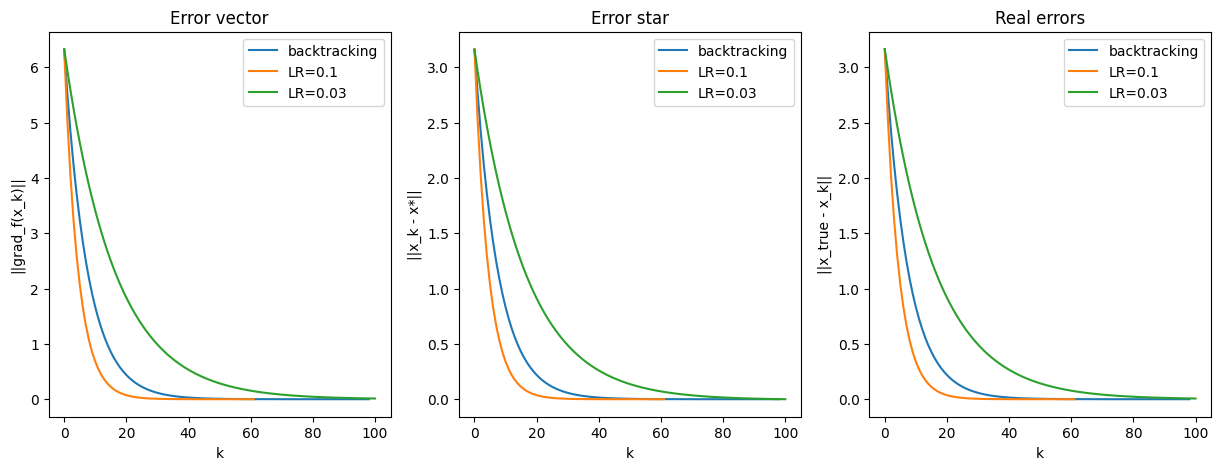

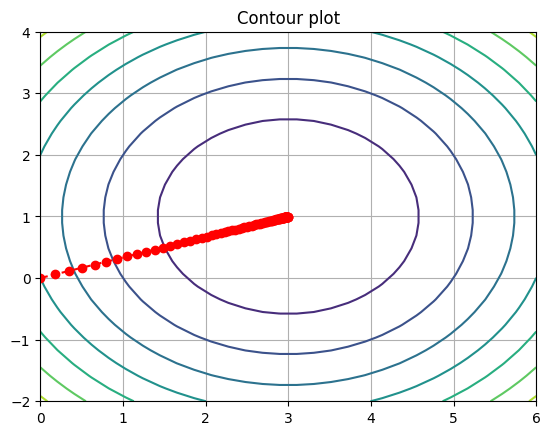

In [90]:
f = lambda x: f1(x)
grad_f = lambda x: grad_f1(x)

x0 = np.asarray([0,0])
tolx = 1e-6
tolf = 1e-6
kmax = 100
x_true = [3, 1]

cvector = np.asarray([0.1, 0.03])

f_tot = []
x_tot = []
err_tot = []
k_tot = []
errors_star_tot = []
true_errors = []
x_min = np.zeros((3, 2))

x, k, f_val, grads, err_val, error_star, real_err  = GD(f, grad_f, x0, kmax, tolf, tolx, useBackTracking=True, real_value=x_true)
f_tot.append(f_val)
x_tot.append(x)
err_tot.append(err_val)
k_tot.append(k)
errors_star_tot.append(error_star)
true_errors.append(real_err)
x_min[0] = x[k]

print(f"Using backtracking with k[{k}]: ", x_min[0])

i=1
for c in cvector:
    x, k, f_val, grads, err_val, error_star, real_err  = GD(f, grad_f, x0, kmax, tolf, tolx, step=c, useBackTracking=False, real_value=x_true)
    
    f_tot.append(f_val)
    x_tot.append(x)
    err_tot.append(err_val)
    k_tot.append(k)
    errors_star_tot.append(error_star)
    true_errors.append(real_err)
    x_min[i] = (x[k])

    print(f"Not using backtracking, with learning rate[{c}] and k[{k}] ", x_min[i])

    i+=1

legend=['backtracking', 'LR=0.1', 'LR=0.03']
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.title('Error vector')
plt.xlabel('k')
plt.ylabel('||grad_f(x_k)||')

for e in range(len(f_tot)):
    kk = np.arange(0, k_tot[e]+1)
    plt.plot(kk, err_tot[e])
plt.legend(legend)


plt.subplot(1,3,2)
plt.title('Error star')
plt.xlabel('k')
plt.ylabel('||x_k - x*||')

for e in range(len(f_tot)):
    kk = np.arange(0, k_tot[e]+1)
    plt.plot(kk, errors_star_tot[e])
plt.legend(legend)

plt.subplot(1,3,3)
plt.title('Real errors')
plt.xlabel('k')
plt.ylabel('||x_true - x_k||')

for e in range(len(f_tot)):
    kk = np.arange(0, k_tot[e]+1)
    plt.plot(kk, true_errors[e])
plt.legend(legend)

plt.show()


xv = np.linspace(0,6,30)
yv = np.linspace(-2,4,30)
xx, yy = np.meshgrid(xv, yv)
#Compute the value of f over the grid
zz = f1([xx, yy])
plt.contour(xx, yy, zz) 

k_backtracking = k_tot[0]
plt.plot(x[:k_backtracking,0],x[:k_backtracking,1],'--ro')

plt.title("Contour plot")
plt.grid()
plt.show()

---

# Test funciton 2

$f(x1, x2) = 10(x_1 − 1)^2 + (x_2 − 2)^2$

Using backtracking with k[100]:  [1.         1.91640091]
Not using backtracking, with learning rate[0.1] and k[100]  [0. 2.]
Not using backtracking, with learning rate[0.08] and k[74]  [1.         1.99999501]
Not using backtracking, with learning rate[0.01] and k[100]  [1.         1.73476089]


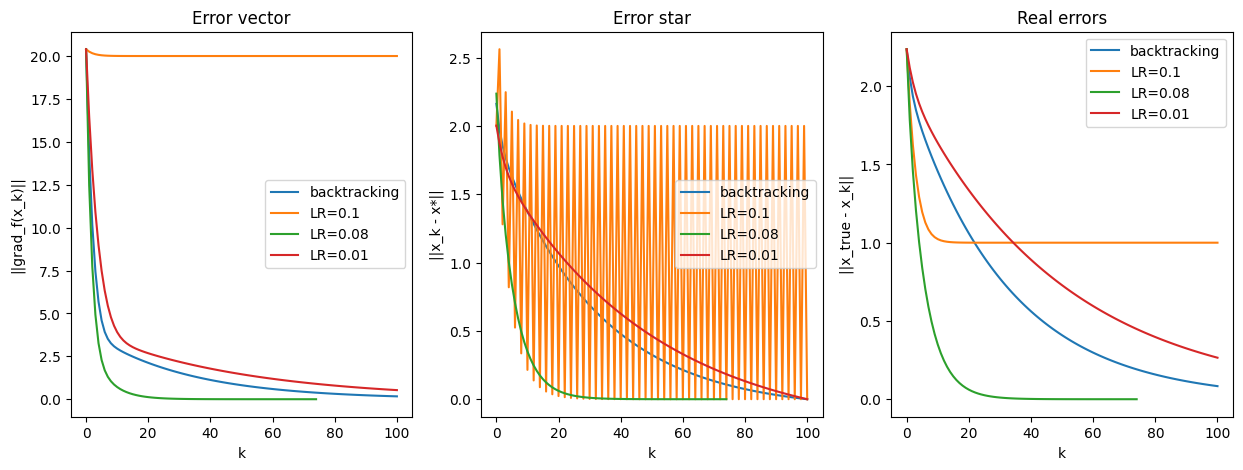

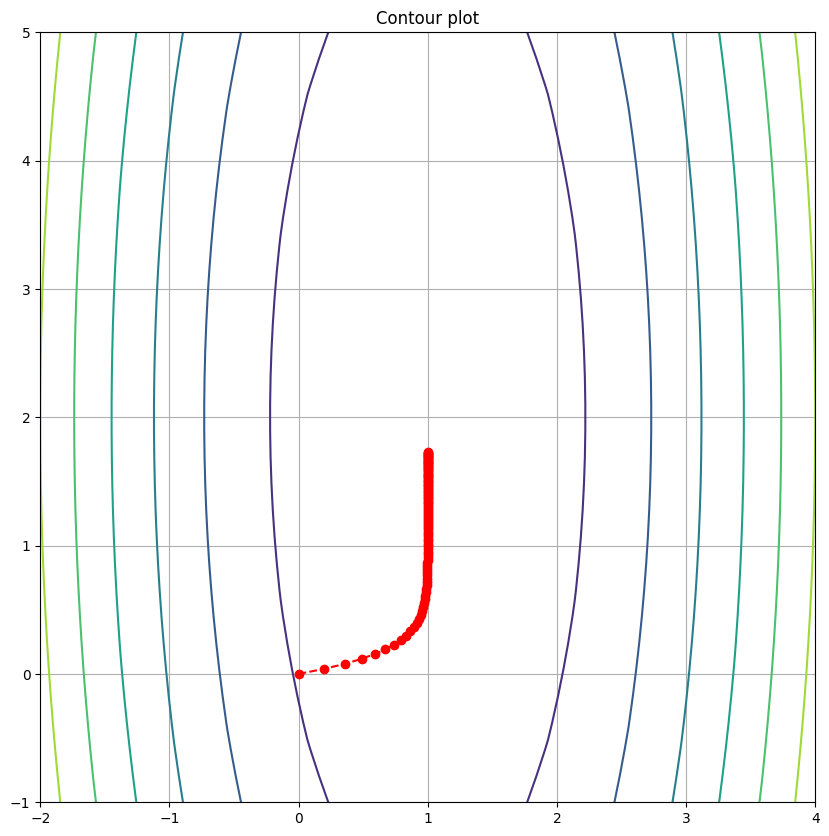

In [91]:
f = lambda x: f2(x)
grad_f = lambda x: grad_f2(x)

x0 = np.asarray([0,0])
tolx = 1e-6
tolf = 1e-6
kmax = 100
x_true = [1, 2]

cvector = np.asarray([0.1,  0.08, 0.01])

f_tot = []
x_tot = []
err_tot = []
k_tot = []
errors_star_tot = []
true_errors = []
x_min = np.zeros((4, 2))

x, k, f_val, grads, err_val, error_star, real_err  = GD(f, grad_f, x0, kmax, tolf, tolx, useBackTracking=True, real_value=x_true)
f_tot.append(f_val)
x_tot.append(x)
err_tot.append(err_val)
k_tot.append(k)
errors_star_tot.append(error_star)
true_errors.append(real_err)
x_min[0] = x[k]

print(f"Using backtracking with k[{k}]: ", x_min[0])

i=1
for c in cvector:
    x, k, f_val, grads, err_val, error_star, real_err  = GD(f, grad_f, x0, kmax, tolf, tolx, step=c, useBackTracking=False, real_value=x_true)
    
    f_tot.append(f_val)
    x_tot.append(x)
    err_tot.append(err_val)
    k_tot.append(k)
    errors_star_tot.append(error_star)
    true_errors.append(real_err)
    x_min[i] = (x[k])

    print(f"Not using backtracking, with learning rate[{c}] and k[{k}] ", x_min[i])

    i+=1

legend=['backtracking', 'LR=0.1', 'LR=0.08', 'LR=0.01']
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.title('Error vector')
plt.xlabel('k')
plt.ylabel('||grad_f(x_k)||')

for e in range(len(f_tot)):
    kk = np.arange(0, k_tot[e]+1)
    plt.plot(kk, err_tot[e])
plt.legend(legend)

plt.subplot(1,3,2)
plt.title('Error star')
plt.xlabel('k')
plt.ylabel('||x_k - x*||')

for e in range(len(f_tot)):
    kk = np.arange(0, k_tot[e]+1)
    plt.plot(kk, errors_star_tot[e])
plt.legend(legend)

plt.subplot(1,3,3)
plt.title('Real errors')
plt.xlabel('k')
plt.ylabel('||x_true - x_k||')

for e in range(len(f_tot)):
    kk = np.arange(0, k_tot[e]+1)
    plt.plot(kk, true_errors[e])
plt.legend(legend)

plt.show()

plt.figure(figsize=(10, 10))
xv = np.linspace(-2, 4, 30)
yv = np.linspace(-1, 5, 30)
xx, yy = np.meshgrid(xv, yv)
#Compute the value of f over the grid
zz = f2([xx, yy])
plt.contour(xx, yy, zz)     
k_backtracking = k_tot[0]
plt.plot(x[:k_backtracking,0],x[:k_backtracking,1],'--ro')

plt.title("Contour plot")
plt.grid()
plt.show()

---

# Test funciton 3

$f(x) = \frac{1}{2}||Ax − b||_2^2$

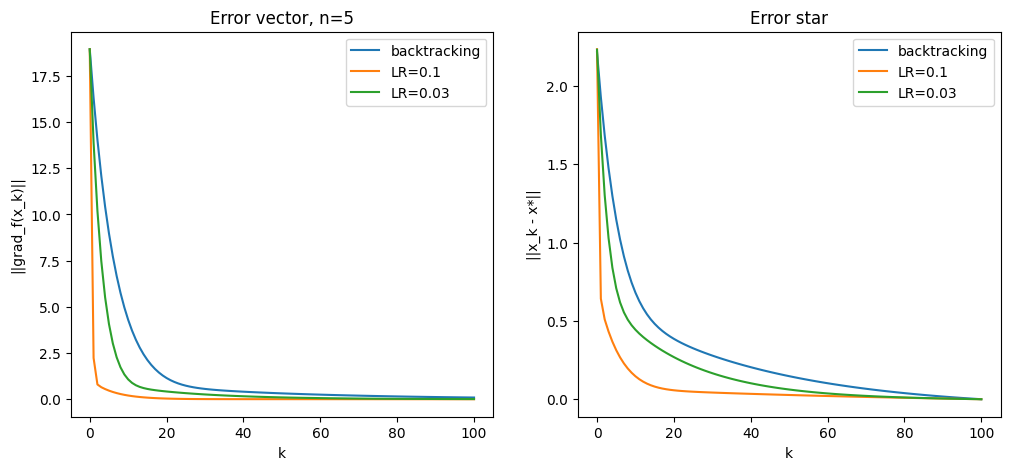

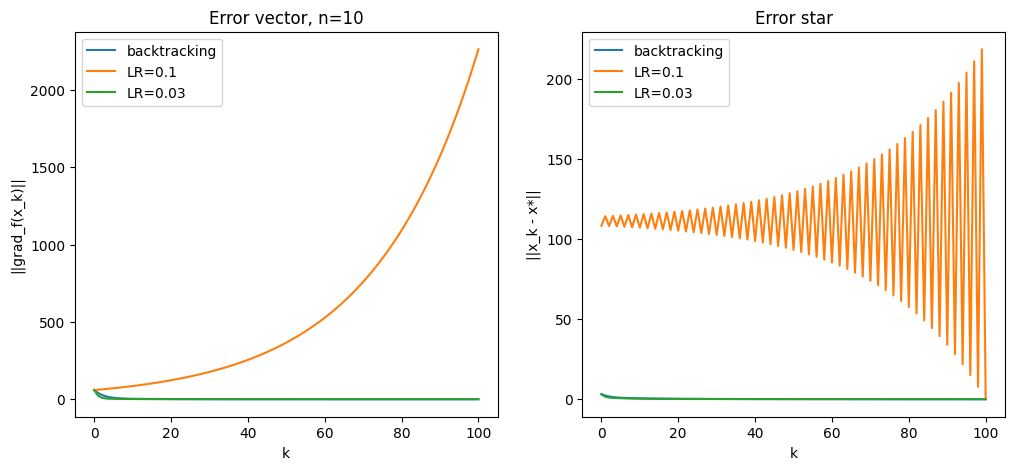

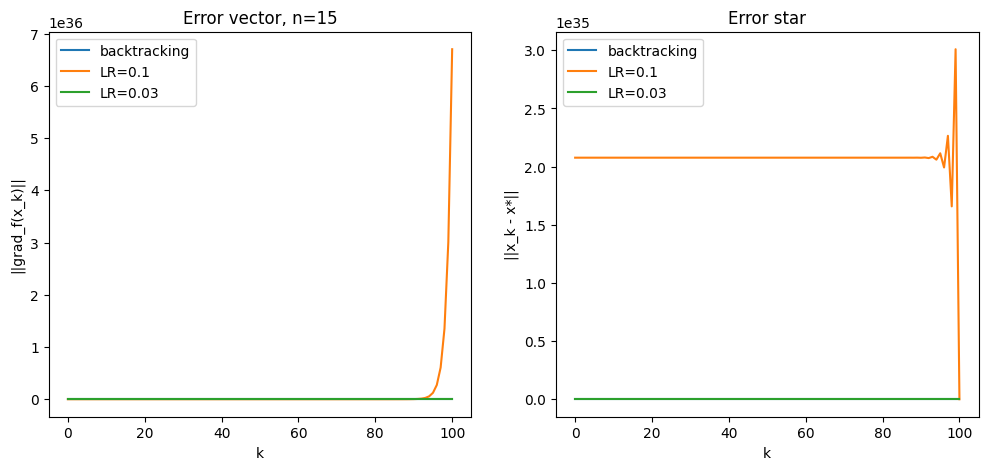

In [92]:
N = np.asarray([5, 10, 15])

tolx = 1e-6
tolf = 1e-6
kmax = 100

cvector = np.asarray([0.1, 0.03, 0.01])
n_vector = np.asarray([5, 10, 15])

for n in n_vector:
    f = lambda x: f3(x, n)
    grad_f = lambda x: grad_f3(x, n)

    f_tot = []
    x_tot = []
    err_tot = []
    err_star_tot = []
    k_tot = []   

    x0 = np.zeros((n, ))
    x_min = np.zeros((4, n))

    x, k, f_val, grads, err_val, err_star, _  = GD(f, grad_f, x0, kmax, tolf, tolx, useBackTracking=True)
    f_tot.append(f_val)
    x_tot.append(x)
    err_tot.append(err_val)
    err_star_tot.append(err_star)
    k_tot.append(k)
    x_min[0] = x[k]
    
    i=1
    for c in cvector:
        x, k, f_val, grads, err_val, err_star, _  = GD(f, grad_f, x0, kmax, tolf, tolx, step=c, useBackTracking=False)
        f_tot.append(f_val)
        x_tot.append(x)
        err_tot.append(err_val)
        err_star_tot.append(err_star)
        k_tot.append(k)
        x_min[i] = (x[k])

        i+=1

    legend=['backtracking', 'LR=0.1', 'LR=0.03', 'LR=0.01']

    plt.figure(figsize=(12, 5))

    plt.subplot(1,2,1)
    plt.title(f'Error vector, n={n}')
    plt.xlabel('k')
    plt.ylabel('||grad_f(x_k)||')
    for e in range(len(cvector)):
        kk = np.arange(0, k_tot[e]+1)
        plt.plot(kk, err_tot[e])
    plt.legend(legend)

    plt.subplot(1,2,2)
    plt.title("Error star")
    plt.xlabel('k')
    plt.ylabel('||x_k - x*||')
    for e in range(len(cvector)):
        kk = np.arange(0, k_tot[e]+1)
        plt.plot(kk, err_star_tot[e])
    plt.legend(legend)

    plt.show()

---

# Test funciton 4

$f(x) = \frac{1}{2}||Ax − b||_2^2+\frac{λ}{2}||x||_2^2$

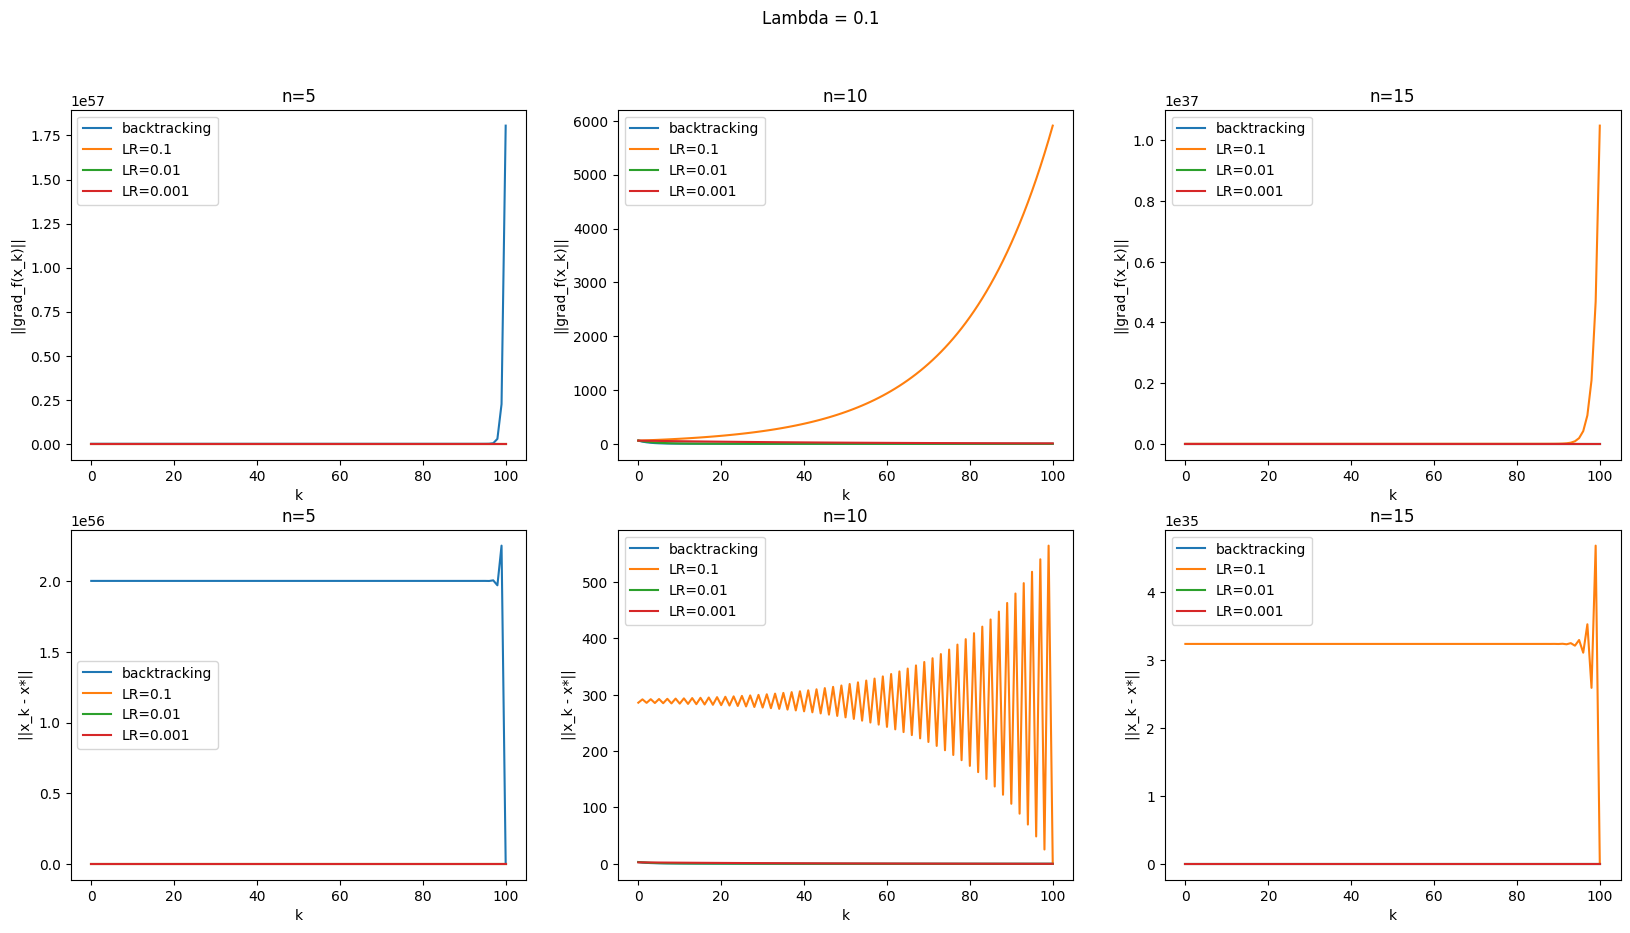

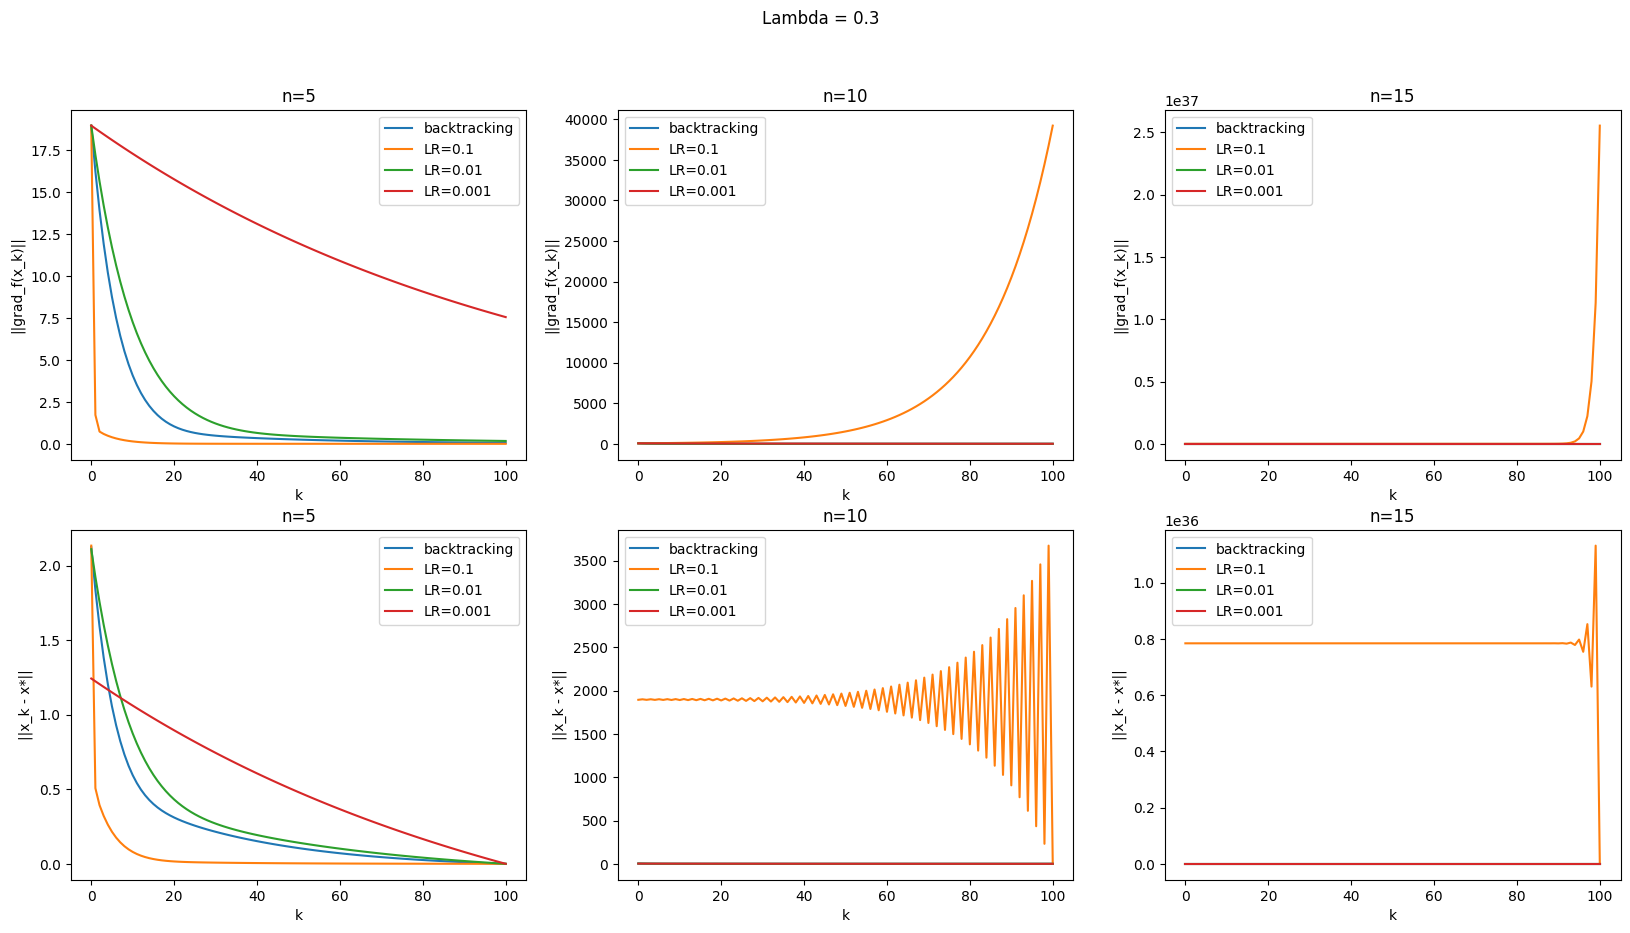

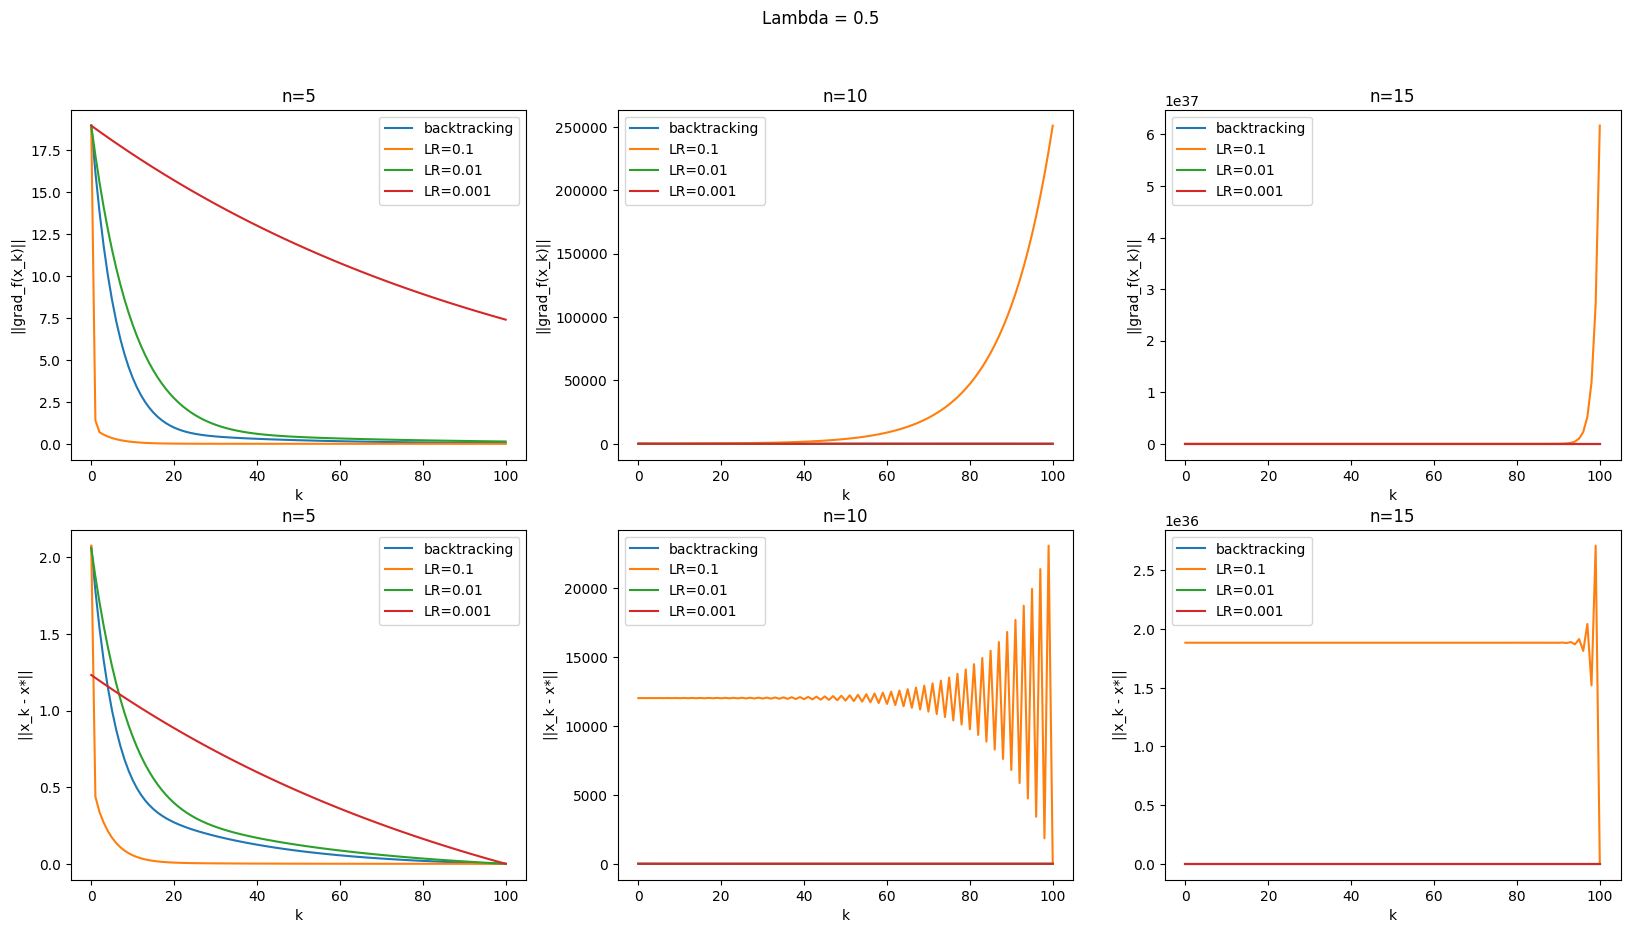

In [93]:
N = np.asarray([5, 10, 15])
L = np.asarray([0.1, 0.3, 0.5])

tolx = 1e-6
tolf = 1e-6
kmax = 100

cvector = np.asarray([0.1, 0.01, 0.001])

f_tot_L = []
x_tot_L = []
err_tot_L = []
err_star_tot_L = []
k_tot_L = []

for lam in L:
    
    f_tot_n = []
    x_tot_n = []
    err_tot_n = []
    err_star_tot_n = []
    k_tot_n = []

    for n in N:

        f_tot = []
        x_tot = []
        err_tot = []
        err_star_tot = []
        k_tot = []

        x0 = np.zeros((n, ))
        x_min = np.zeros((6, n))

        f = lambda x: f4(x, n, lam)
        grad_f = lambda x: grad_f4(x, n, lam)

        x, k, f_val, grads, err_val, err_star, _  = GD(f, grad_f, x0, kmax, tolf, tolx, useBackTracking=True)
    
        f_tot.append(f_val)
        x_tot.append(x)
        err_tot.append(err_val)
        err_star_tot.append(err_star)
        k_tot.append(k)
        x_min[0] = x[k]
        
        i=1
        for c in cvector:
            x, k, f_val, grads, err_val, err_star, _  = GD(f, grad_f, x0, kmax, tolf, tolx, step=c, useBackTracking=False)
            
            f_tot.append(f_val)
            x_tot.append(x)
            err_tot.append(err_val)
            err_star_tot.append(err_star)
            k_tot.append(k)
            x_min[i] = (x[k])

            i+=1

        f_tot_n.append(f_tot)
        x_tot_n.append(x_tot)
        err_tot_n.append(err_tot)
        err_star_tot_n.append(err_star_tot)
        k_tot_n.append(k_tot)

    f_tot_L.append(f_tot_n)
    x_tot_L.append(x_tot_n)
    err_tot_L.append(err_tot_n)
    err_star_tot_L.append(err_star_tot_n)
    k_tot_L.append(k_tot_n)

for lam in range(len(L)):

    plt.figure(figsize=(20, 10))
    plt.suptitle(f'Lambda = {L[lam]}')
    legend=['backtracking', 'LR=0.1', 'LR=0.01', 'LR=0.001']
    
    for i in range(len(f_tot_L[lam])):

        plt.subplot(2, len(f_tot_L[lam]), i+1)
        plt.title(f"n={N[i]}")
    
        for e in range(len(f_tot_L[lam][i])):
            plt.xlabel('k')
            plt.ylabel('||grad_f(x_k)||')

            kk = np.arange(0, k_tot_L[lam][i][e]+1)
            plt.plot(kk, err_tot_L[lam][i][e])
            plt.legend(legend)

    j = i+1
    for i in range(len(f_tot_L[lam])):

        plt.subplot(2, len(f_tot_L[lam]), j+1)
        plt.title(f"n={N[i]}")
        
    
        for e in range(len(f_tot_L[lam][i])):
            plt.xlabel('k')
            plt.ylabel('||x_k - x*||')

            kk = np.arange(0, k_tot_L[lam][i][e]+1)
            plt.plot(kk, err_star_tot_L[lam][i][e])
            plt.legend(legend)

        j+=1

    plt.show()

---

# Test funciton 5

$f(x) = x^4 + x^3 -2x^2 - 2x$

- Only for the non-convex function defined in 5, plot it in the interval [-3; 3] and test the convergence point of GD with different values of $x_0$ and different step-sizes. Observe when the convergence point is the global minimum and when it stops on a local minimum or maximum.

In [94]:
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

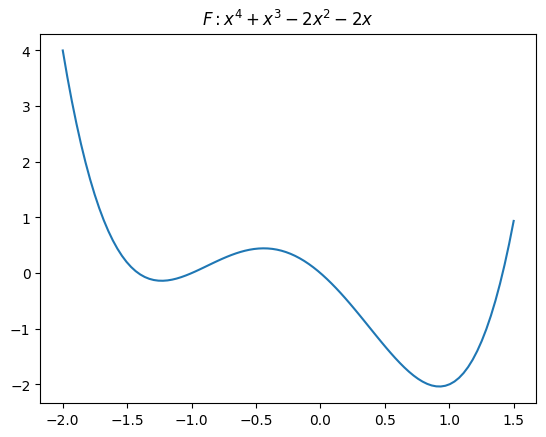

Iterations:  28
solution: [ [0.92222367] -2.0377480414885216 ]


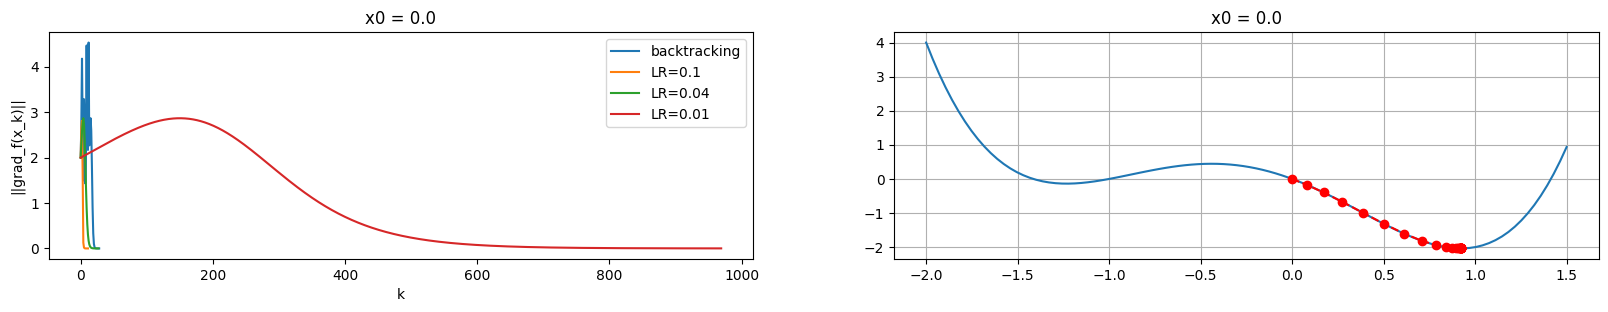

Iterations:  17
solution: [ [-1.23223704] -0.13781766895575398 ]


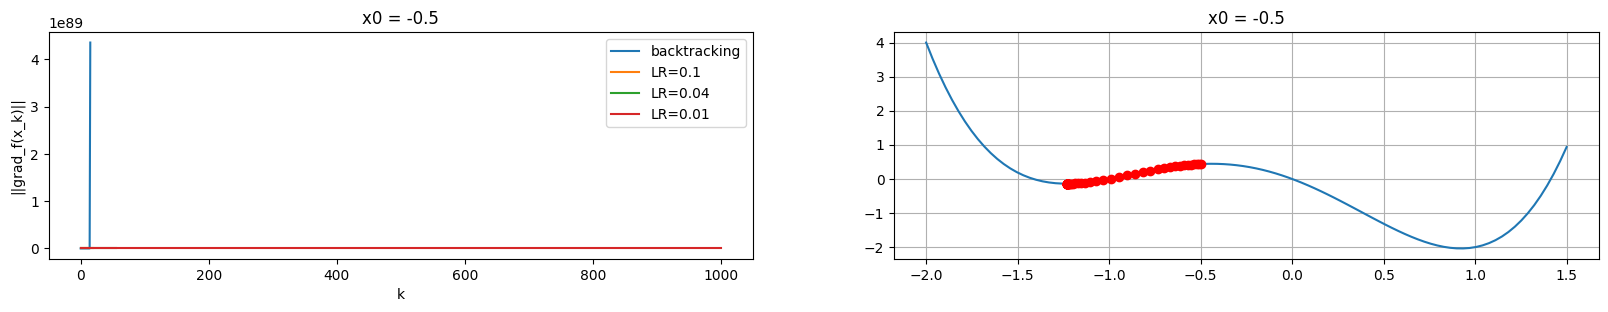

Iterations:  41
solution: [ [-1.23224223] -0.1378176689553361 ]


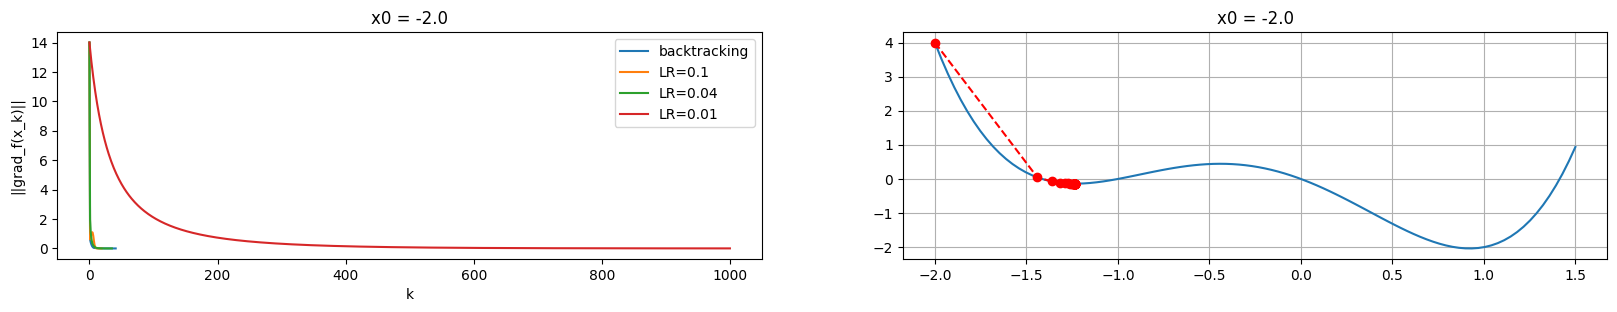

In [95]:
f = lambda x: f5(x)
grad_f = lambda x: grad_f5(x)

tolx = 1e-6
tolf = 1e-6
kmax = 1000

x0_vector = np.asarray([[0], [-0.5], [-2]])
cvector = np.asarray([0.1, 0.04, 0.001])

f_tot_x0 = []
x_tot_x0 = []
err_tot_x0 = []
k_tot_x0 = []

x = np.linspace(-2,1.5,100)
y = f(x)
plt.plot(x,y)
plt.title("$F: x^{4}+x^{3}-2x^{2}-2x$")
plt.show()

for x0 in x0_vector:
    f_tot = []
    x_tot = []
    err_tot = []
    k_tot = []

    x, k, f_val, grads, err_val, _, _ = GD(f, grad_f, x0, kmax, tolf, tolx, useBackTracking=True)
    f_tot.append(f_val)
    x_tot.append(x)
    err_tot.append(err_val)
    k_tot.append(k)

    i=1
    for c in cvector:
        x, k, f_val, grads, err_val, _, _ = GD(f, grad_f, x0, kmax, tolf, tolx, step=c, useBackTracking=False)
        
        f_tot.append(f_val)
        x_tot.append(x)
        err_tot.append(err_val)
        k_tot.append(k)

        i+=1

    f_tot_x0.append(f_tot)
    x_tot_x0.append(x_tot)
    err_tot_x0.append(err_tot)
    k_tot_x0.append(k_tot)


i = 1
for x0_index in range(len(x0_vector)):
    [x0] = x0_vector[x0_index]

    plt.figure(figsize=(20, 10))
    plt.subplot(3, 2, i)
    plt.title(f'x0 = {x0}')
    legend=['backtracking', 'LR=0.1', 'LR=0.04', 'LR=0.01']

    for e in range(len(f_tot_x0[x0_index])):
        plt.xlabel('k')
        plt.ylabel('||grad_f(x_k)||')

        kk = np.arange(0, k_tot_x0[x0_index][e]+1)
        plt.plot(kk, err_tot_x0[x0_index][e])
        plt.legend(legend)

    i+=1
    plt.subplot(3, 2, i)
    plt.title(f'x0 = {x0}')

    x_plot = np.linspace(-2,1.5,100)
    y_plot = []
    for e in x_plot:
        y_plot.append(f5(e))
    
    plt.plot(x_plot,y_plot)
    xmin = x_tot_x0[x0_index][2]
    f_val_min = f_tot_x0[x0_index][2]
    plt.plot(xmin, f_val_min, "--ro")
    plt.grid()
    
    print("Iterations: ", k_tot_x0[x0_index][0])
    print("solution: [", xmin[-1], f_val_min[-1], "]")

    i+=1
    plt.show()

# Optimization via Stochastic Gradient Descent

## Implement SGD function

In [96]:
def shuffle_data(X, Y):
    _, N = X.shape
    indexes = np.arange(N)
    np.random.shuffle(indexes)

    X_shuffle = X[:, indexes]
    Y_shuffle = Y[indexes]

    return X_shuffle, Y_shuffle

In [97]:
def SGD(l, grad_l, w0, D, batch_size, n_epochs, alpha):
    lr = alpha  
    X, Y = D  
    d, N = X.shape

    n_batch_per_epoch = N//batch_size
    tot_batch = n_batch_per_epoch * n_epochs
    
    w = np.array(w0)
    f_val = np.zeros((n_epochs, ))
    grads = np.zeros((n_epochs, d))
    err = np.zeros((n_epochs,))
    w_vector = np.zeros((tot_batch, len(w0)))
       
    for epoch in range(n_epochs):
        X_shuffle, Y_shuffle = shuffle_data(X, Y)
        
        for b in range (n_batch_per_epoch):  
            n = b*batch_size
            m = (b+1)*batch_size

            Mx = X_shuffle[:, n:m]
            My = Y_shuffle[n:m]

            w = w - lr * grad_l(w, Mx, My)
            w_vector[epoch*n_batch_per_epoch + b, :] = w
            
        f_val[epoch] = l(w, X_shuffle, Y_shuffle)
        grads[epoch, :] = grad_l(w, X_shuffle, Y_shuffle)
        err[epoch] = np.linalg.norm(grad_l(w, X_shuffle, Y_shuffle))

    return w_vector, f_val, grads, err

## Prepare Dataset and Loss

In [98]:
data = pd.read_csv('./data.csv')
data = np.array(data)   

X0 = data[:, 1:].T
Y0 = data[:, 0]

def choose_labels(labels):
    idx = [index for index, elem in enumerate(Y0) if elem in labels]

    X = X0[:, idx]     
    Y = Y0[idx]

    return X, Y

def split_data(X, Y, Ntrain):

    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

In [99]:
# Value of the loss
def loss_function(w, x_hat, y):
    z = fw(x_hat, w)
    
    _, N = x_hat.shape
    y = np.reshape(y, (N,1))
    
    return (np.sum(MSE(z, y))/N)

def fw(xhat, w):
    return sigmoid(xhat.T @ w)

def sigmoid(z):
    return 1./(1 + np.exp(-z))

def MSE(y, y1):
    return ((np.linalg.norm(y - y1))**2)    

def grad_loss_function(w, Xhat, Y):
    N = Xhat.shape[1]
    a = sigmoid(Xhat.T@w)
    b = fw(w,Xhat) - Y
    c = Xhat @ ((1/N) * a * (1 - a) * b)

    return  c

def predict(w, X_hat, treshold=0.5):
    z = fw(w, X_hat)
    
    _, N = X_hat.shape
    predictions = np.zeros((N,))
    predictions = z>treshold
    return predictions

def accuracy(pred, label):
    N, = pred.shape
    correct = [pred == label]
    correct_sum = int(np.sum(correct))

    return (correct_sum, correct_sum/N*100)

In [103]:
def logistic_regression_classificator(classes, perc_train, alpha, mode='SGD', batch_size=0, n_epochs=0):
    X, Y = choose_labels(classes)

    # Binary conversion 
    Y[Y == classes[0]] = 0
    Y[Y == classes[1]] = 1

    Ntrain = int(perc_train * Y.shape[0]/100)
    (Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, Ntrain)
    l, N = Xtrain.shape
    
    # Computation of the dataset with ones in the first element
    X_hat = np.concatenate((np.ones((1, N)), Xtrain))
    
    #Initial weights vector
    mean=0
    sigma=1e-3
    w0 = np.random.normal(mean, sigma, size=Xtrain.shape[0]+1)

    D = (X_hat, Ytrain)

    #Training
    if mode == 'SGD':
        w_vector, _, _, err = SGD(loss_function, grad_loss_function, w0, D, batch_size, n_epochs, alpha)
    else:        
        loss_function_gd = lambda w: loss_function(w, X_hat, Ytrain)
        grad_loss_function_gd = lambda w: grad_loss_function(w, X_hat, Ytrain)
        w_vector, _, _, _, err, _, _ = GD(loss_function_gd, grad_loss_function_gd, w0, kmax=100, step=alpha, useBackTracking=False)

    #Testing the accuracy on test data
    X_hat_test = np.concatenate((np.ones((1, Xtest.shape[1])), Xtest))
    final_weights = w_vector[-1]

    predictions = predict(final_weights, X_hat_test)

    _, acc = accuracy(predictions, Ytest)
    
    return (w_vector, err, acc)

In [101]:
label1 = int(input("Choose a digit: "))
label2 = int(input("Choose another digit: "))
classes = [label1, label2]

perc_train = int(input("Choose the percentage of training data: "))

batch_size = 15
n_epochs = 50
alpha = 1e-3

_, _, accuracy_SGD = logistic_regression_classificator(classes, perc_train, alpha, 'SGD', batch_size, n_epochs)
print(f"The accuracy is: {accuracy_SGD}%")

The accuracy is: 99.17262128619781%


- The training procedure will end up with a set of optimal parameters $w^*$. Compare $w^*$ when computed with GD and SGD, for different digits and different training set dimensions.

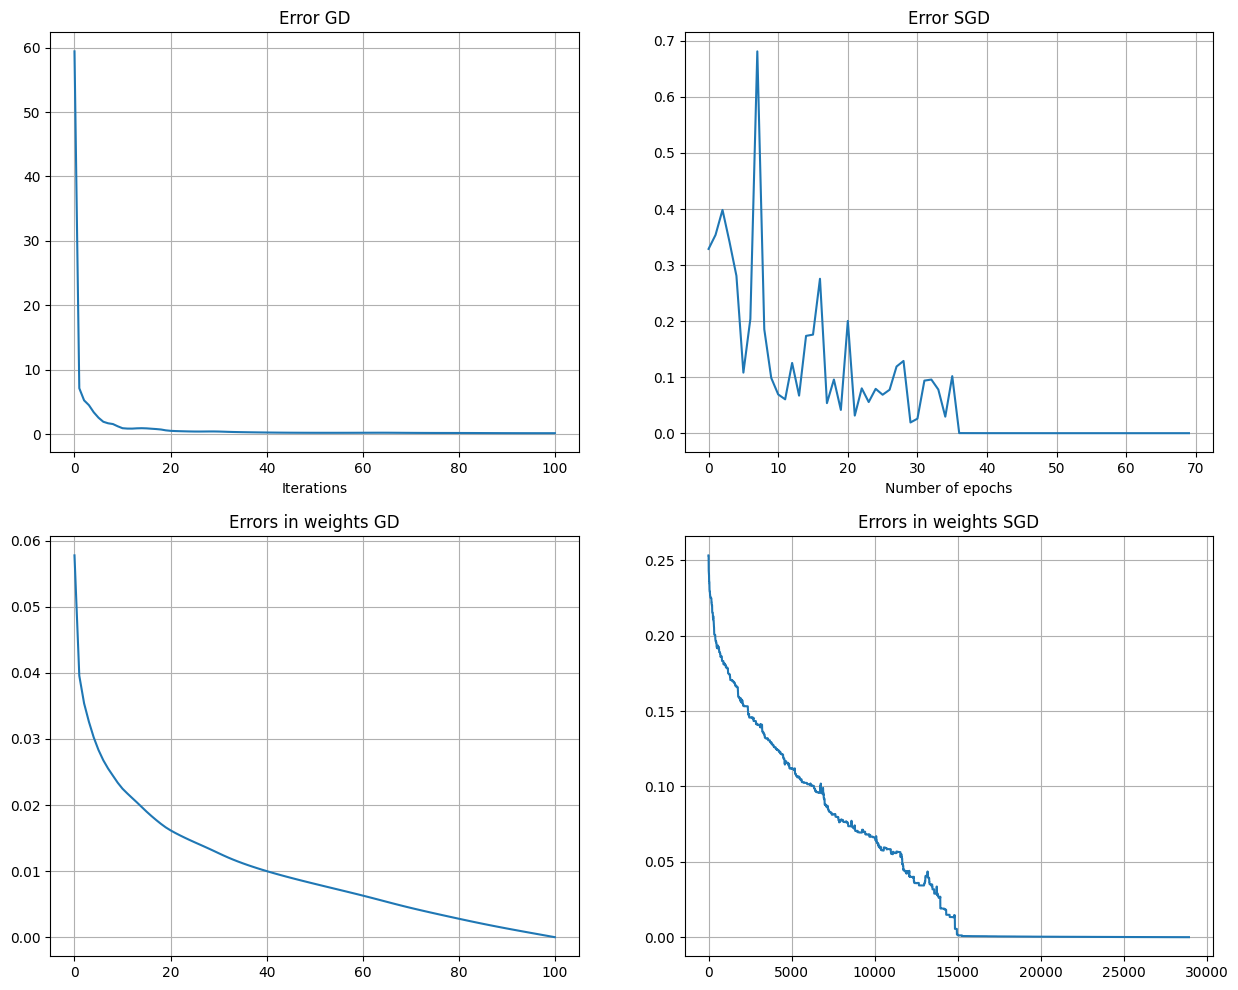

The accuracy with SGD is: 99.21022940955247% and the accuracy with GD is: 98.68371568258743%


In [126]:
label1 = int(input("Choose a digit: "))
label2 = int(input("Choose another digit: "))
classes = [label1, label2]

perc_train = int(input("Choose the percentage of training data: "))

batch_size = 15
n_epochs = 70
alpha = 1e-3

w_vector_SGD, err_SGD, accuracy_SGD = logistic_regression_classificator(classes, perc_train, alpha, 'SGD', batch_size, n_epochs)
w_vector_GD, err_GD, accuracy_GD = logistic_regression_classificator(classes, perc_train, alpha, 'GD' )

w_star_SGD = w_vector_SGD[-1]
w_star_GD = w_vector_GD[-1]

plt.figure(figsize=(15, 12))

plt.subplot(2,2,1)
x_gd = np.arange(0, 100+1)
plt.plot(x_gd, err_GD)
plt.title("Error GD")
plt.xlabel('Iterations')
plt.grid()

plt.subplot(2,2,2)
x_sgd = np.arange(0, n_epochs)
plt.plot(x_sgd, err_SGD)
plt.title("Error SGD")
plt.xlabel('Number of epochs')
plt.grid()

plt.subplot(2,2,3)
x_gd = np.arange(0, 100+1)
w_star_errors_GD = np.linalg.norm(w_vector_GD - w_star_GD, axis=1)
plt.plot(x_gd, w_star_errors_GD)
plt.title("Errors in weights GD")
plt.grid()

plt.subplot(2,2,4)
w_star_errors_SGD = np.linalg.norm(w_vector_SGD - w_star_SGD, axis=1)
plt.plot(w_star_errors_SGD)
plt.title("Errors in weights SGD")
plt.grid()

plt.show()

print(f"The accuracy with SGD is: {accuracy_SGD}% and the accuracy with GD is: {accuracy_GD}%")